#Pricing Analyst Assessment for Domestic and General

Masoumeh Fanaei

31/07/2023

#Improting Libraries

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Statistical analysis
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.cluster import KMeans




#Preparing Data

##Importing and Exploring Data

In [2]:

raw_df = pd.read_csv('pricing_analyst_dataset.csv', index_col=None)

In [3]:
raw_df.columns

Index(['offerdate', 'sold_fee', 'offered_fee', 'purchase_price',
       'purchase_date', 'age', 'pricing_point', 'predictedconversionrate',
       'plan_flag', 'plan_count', 'plansactive_lastyear_count',
       'planscancelled_lastyear_count', 'claims_count', 'claim_amount',
       'price_diff', 'IsModel', 'sale_flag', 'base_fee',
       'manufacturerbrandname_enc', 'itemcategoryname_enc',
       'itemsupercategorycode_enc'],
      dtype='object')

In [4]:
raw_df.head()

,offerdate,sold_fee,offered_fee,purchase_price,purchase_date,age,pricing_point,predictedconversionrate,plan_flag,plan_count,...,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,IsModel,sale_flag,base_fee,manufacturerbrandname_enc,itemcategoryname_enc,itemsupercategorycode_enc
0,17/03/2023,NaN,32.64,89.99,16/03/2023,1,@22%,0.15,0,0.0,...,0.0,0.0,0.00,-0.058824,Yes,0,34.68,56,35,14
1,01/03/2023,69.72,69.72,329.00,24/12/2022,67,@22%,0.81,1,5.0,...,2.0,4.0,347.12,-0.023529,Yes,1,71.40,123,34,3
2,12/04/2023,NaN,48.24,249.00,05/04/2023,7,@23%,0.08,0,0.0,...,0.0,0.0,0.00,0.210843,Yes,0,39.84,7,16,12
3,09/03/2023,NaN,91.92,746.42,09/03/2021,730,@23%,0.32,0,0.0,...,0.0,0.0,0.00,0.298305,Yes,0,70.80,107,36,4
4,18/03/2023,NaN,89.64,493.98,18/03/2023,0,@22%,0.25,1,1.0,...,0.0,0.0,0.00,0.299130,Yes,0,69.00,57,36,4


In [5]:
raw_df.describe()

,sold_fee,offered_fee,purchase_price,predictedconversionrate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,price_diff,sale_flag,base_fee,manufacturerbrandname_enc,itemcategoryname_enc,itemsupercategorycode_enc
count,1991.000000,8867.000000,8866.000000,8867.000000,8867.000000,8826.000000,8826.000000,8826.000000,7718.000000,7718.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000
mean,53.085445,53.029268,406.714300,0.315993,0.197135,0.409245,0.683889,0.232948,0.210935,29.233799,0.080764,0.224540,49.090976,53.764746,22.601218,4.677117
std,15.115377,16.273887,214.171991,0.298250,0.397858,1.033808,1.966232,0.982052,0.896236,187.440800,0.129798,0.417303,13.565841,38.936852,10.902879,3.894367
min,18.600000,12.720000,19.990000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.298643,0.000000,18.000000,-1.000000,0.000000,0.000000
25%,45.120000,45.000000,295.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.480000,16.000000,12.000000,2.000000
50%,48.240000,48.120000,330.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069149,0.000000,45.960000,57.000000,19.000000,4.000000
75%,63.360000,63.600000,472.085000,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169096,0.000000,59.640000,74.000000,36.000000,4.000000
max,150.000000,150.000000,1200.000000,1.000000,1.000000,5.000000,32.000000,25.000000,30.000000,10523.030000,0.299886,1.000000,150.000000,130.000000,37.000000,16.000000


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   offerdate                      8867 non-null   object 
 1   sold_fee                       1991 non-null   float64
 2   offered_fee                    8867 non-null   float64
 3   purchase_price                 8866 non-null   float64
 4   purchase_date                  8867 non-null   object 
 5   age                            8867 non-null   object 
 6   pricing_point                  8867 non-null   object 
 7   predictedconversionrate        8867 non-null   float64
 8   plan_flag                      8867 non-null   int64  
 9   plan_count                     8826 non-null   float64
 10  plansactive_lastyear_count     8826 non-null   float64
 11  planscancelled_lastyear_count  8826 non-null   float64
 12  claims_count                   7718 non-null   f

##Cleaning Data

In [7]:
# Replace missing values (NaN) in the 'sold_fee' column with zero (0)
raw_df['sold_fee'] = raw_df['sold_fee'].fillna(0)

In [8]:
# Replace missing values (NaN) in the 'claims_count' column with zero (0) for rows where 'sale_flag' is equal to 0
raw_df.loc[(raw_df['sale_flag'] == 0) & (raw_df['claims_count'].isna()), 'claims_count'] = 0

In [9]:
# Replace missing values (NaN) in the 'claim_value' column with zero (0) for rows where 'sale_flag' is equal to 0
raw_df.loc[(raw_df['sale_flag'] == 0) & (raw_df['claim_amount'].isna()), 'claim_amount'] = 0

In [10]:
# Replace missing values (NaN) in the 'paln_count' column with zero (0) for rows where 'plan_flag' is equal to 0
raw_df.loc[(raw_df['plan_flag'] == 0) & (raw_df['plan_count'].isna()), 'plan_count'] = 0

In [11]:
# Replace missing values (NaN) in the 'plansactive_lastyear_count' column with zero (0) for rows where 'plan_flag' is equal to 0
raw_df.loc[(raw_df['plan_flag'] == 0) & (raw_df['plansactive_lastyear_count'].isna()), 'plansactive_lastyear_count'] = 0

In [12]:
# Replace missing values (NaN) in the 'planscancelled_lastyear_count' column with zero (0) for rows where 'plan_flag' is equal to 0
raw_df.loc[(raw_df['plan_flag'] == 0) & (raw_df['planscancelled_lastyear_count'].isna()), 'planscancelled_lastyear_count'] = 0

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   offerdate                      8867 non-null   object 
 1   sold_fee                       8867 non-null   float64
 2   offered_fee                    8867 non-null   float64
 3   purchase_price                 8866 non-null   float64
 4   purchase_date                  8867 non-null   object 
 5   age                            8867 non-null   object 
 6   pricing_point                  8867 non-null   object 
 7   predictedconversionrate        8867 non-null   float64
 8   plan_flag                      8867 non-null   int64  
 9   plan_count                     8867 non-null   float64
 10  plansactive_lastyear_count     8867 non-null   float64
 11  planscancelled_lastyear_count  8867 non-null   float64
 12  claims_count                   8483 non-null   f

Now, we can drop the remaining NaN values as they account for less than 5% of the data.

In [14]:
df = raw_df.dropna()

In [15]:
#Calculate the time difference between offerdate and purchase_date
df['offerdate'] = pd.to_datetime(df['offerdate'])
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

df['days_between_offer_purchase'] = ( df['offerdate']-df['purchase_date'] ).dt.days

<ipython-input-15-fc1f11c1adc2>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['offerdate'] = pd.to_datetime(df['offerdate'])
<ipython-input-15-fc1f11c1adc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offerdate'] = pd.to_datetime(df['offerdate'])
<ipython-input-15-fc1f11c1adc2>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['purchase_date'] = pd.to_datetime(df['purchase_date'])
<ipython-input-15-fc1f11c1adc2>:3: SettingWithCopyWarning: 
A v

In [16]:
df = df.drop(['offerdate', 'purchase_date'], axis=1)

In [17]:
#remove rows where 'age' is meaningless
df = df[df['age'] != '-0.41']



In [18]:
df['age'] = pd.to_numeric(df['age'].str.replace(',', ''), errors='coerce')


In [19]:
# Define the mapping of categories to numeric values
category_mapping = {'@22%': 22, '@23%':23, 'ASIS FEE':0}

# Use label encoding to convert the column to numeric values
df['pricing_point'] = df['pricing_point'].map(category_mapping)


In [20]:
# Define the mapping of categories to numeric values
category_mapping = {'Yes': 1, 'No':0}

# Use label encoding to convert the column to numeric values
df['IsModel'] = df['IsModel'].map(category_mapping)

In [21]:
# Define the conditions and assign categories (based on the 25%, 50% and 75% of 'age' column)
condition1 = df['age'] <= 1
condition2 = (df['age'] > 1) & (df['age'] <= 7)
condition3 = (df['age'] > 7) & (df['age'] <= 32)
condition4 = df['age'] > 32

# Create a new column 'age_group' and assign categories based on conditions
df['age_group'] = ''
df.loc[condition1, 'age_group'] = 'Less than or equal to 1 day'
df.loc[condition2, 'age_group'] = '2 to 7 days'
df.loc[condition3, 'age_group'] = '8 to 32 days'
df.loc[condition4, 'age_group'] = 'More than 32 days'

# Convert 'age_group' column to categorical data type
df['age_group'] = pd.Categorical(df['age_group'], categories=['Less than or equal to 1 day', '2 to 7 days', '8 to 32 days', 'More than 32 days'], ordered=True)

In [22]:
# Define the mapping of categories to numeric values
category_mapping = {'Less than or equal to 1 day':1, '2 to 7 days':2, '8 to 32 days':3, 'More than 32 days':4}

# Use label encoding to convert the column to numeric values
df['age_cat'] = df['age_group'].map(category_mapping)
df['age_cat'] = df['age_cat'].astype(int)

In [23]:
#prepared data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8481 entries, 0 to 8866
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   sold_fee                       8481 non-null   float64 
 1   offered_fee                    8481 non-null   float64 
 2   purchase_price                 8481 non-null   float64 
 3   age                            8481 non-null   float64 
 4   pricing_point                  8481 non-null   int64   
 5   predictedconversionrate        8481 non-null   float64 
 6   plan_flag                      8481 non-null   int64   
 7   plan_count                     8481 non-null   float64 
 8   plansactive_lastyear_count     8481 non-null   float64 
 9   planscancelled_lastyear_count  8481 non-null   float64 
 10  claims_count                   8481 non-null   float64 
 11  claim_amount                   8481 non-null   float64 
 12  price_diff                     848

In [24]:
df.describe()

,sold_fee,offered_fee,purchase_price,age,pricing_point,predictedconversionrate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,...,claim_amount,price_diff,IsModel,sale_flag,base_fee,manufacturerbrandname_enc,itemcategoryname_enc,itemsupercategorycode_enc,days_between_offer_purchase,age_cat
count,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,...,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000
mean,9.955953,52.928207,406.603667,55.369414,19.670204,0.309228,0.173918,0.374012,0.640019,0.223323,...,26.489966,0.080158,0.874543,0.189364,49.024054,53.613489,22.589317,4.688362,68.502771,2.434854
std,21.603949,16.298308,214.336392,129.601551,7.465254,0.298189,0.379061,1.014031,1.967423,0.977761,...,178.804070,0.129545,0.331256,0.391821,13.616460,39.019158,10.889305,3.904722,169.028521,1.157638
min,0.000000,12.720000,19.990000,-37.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.298643,0.000000,0.000000,18.000000,-1.000000,0.000000,0.000000,-303.000000,1.000000
25%,0.000000,45.000000,295.000000,1.000000,22.000000,0.120000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,39.360000,16.000000,12.000000,2.000000,0.000000,1.000000
50%,0.000000,48.120000,330.000000,7.000000,22.000000,0.180000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.067024,1.000000,0.000000,45.960000,57.000000,19.000000,4.000000,7.000000,2.000000
75%,0.000000,63.600000,472.320000,32.000000,23.000000,0.340000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.169096,1.000000,0.000000,59.640000,74.000000,36.000000,4.000000,99.000000,3.000000
max,150.000000,150.000000,1200.000000,1056.000000,23.000000,1.000000,1.000000,5.000000,32.000000,25.000000,...,10523.030000,0.299886,1.000000,1.000000,150.000000,130.000000,37.000000,16.000000,1170.000000,4.000000


#Visualisation:

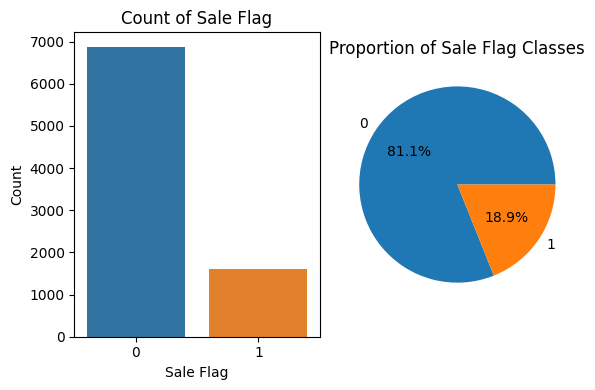

In [25]:
# Create a 1x2 subplot grid
plt.figure(figsize=(6,4))

# Subplot 1: Count of Sale Flag
plt.subplot(1, 2, 1)
sns.countplot(x='sale_flag', data=df)
plt.xlabel('Sale Flag')
plt.ylabel('Count')
plt.title('Count of Sale Flag')

# Subplot 2: Proportion of Sale Flag Classes (Pie chart)
plt.subplot(1, 2, 2)
df['sale_flag'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Sale Flag Classes')
plt.ylabel('')

plt.tight_layout()
plt.show()


It shows that we have an imbalanced data for the sale_flag variable.

##Distribution of Numeric Features

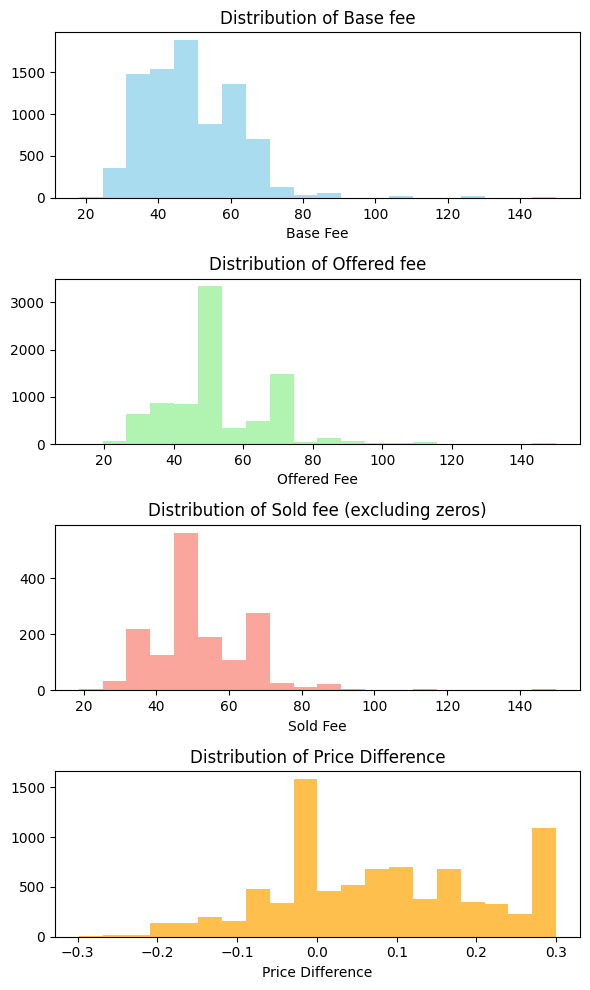

In [26]:
plt.figure(figsize=(6, 10))

# Subplot 1: Distribution of Base fee
plt.subplot(4,1,1)
plt.hist(df['base_fee'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Base Fee')
plt.title('Distribution of Base fee')

# Subplot 2: Distribution of Offered fee
plt.subplot(4,1,2)
plt.hist(df['offered_fee'], bins=20, color='lightgreen', alpha=0.7)
plt.xlabel('Offered Fee')
plt.title('Distribution of Offered fee')

# Subplot 3: Distribution of Sold fee (excluding zeros)
plt.subplot(4,1,3)
df_filtered = df[df['sold_fee'] != 0]
plt.hist(df_filtered['sold_fee'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('Sold Fee')
plt.title('Distribution of Sold fee (excluding zeros)')

# Subplot 4: Distribution of Price Difference
plt.subplot(4, 1, 4)
plt.hist(df['price_diff'], bins=20, color='orange', alpha=0.7)
plt.xlabel('Price Difference')
plt.title('Distribution of Price Difference')

plt.tight_layout()
plt.show()


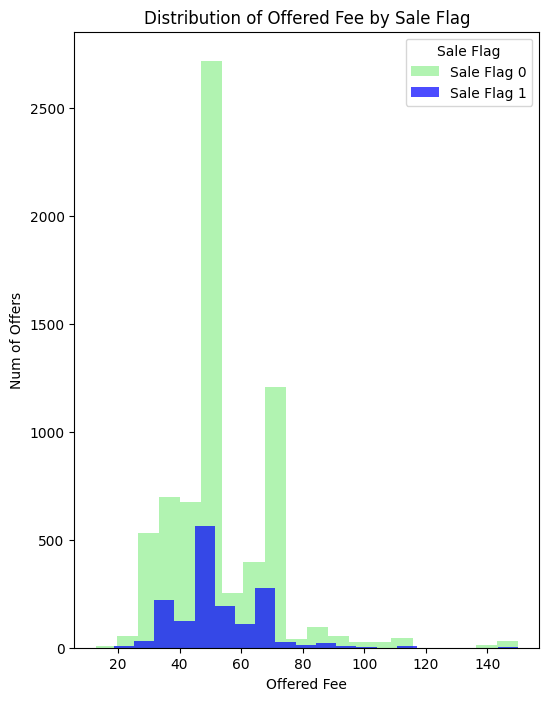

In [27]:
# Separate data for each 'sale_flag' value
offered_fee_sale_flag_0 = df[df['sale_flag'] == 0]['offered_fee']
offered_fee_sale_flag_1 = df[df['sale_flag'] == 1]['offered_fee']

# Plot histograms with different colors
plt.figure(figsize=(6, 8))
plt.hist(offered_fee_sale_flag_0, bins=20, color='lightgreen', alpha=0.7, label='Sale Flag 0')
plt.hist(offered_fee_sale_flag_1, bins=20, color='blue', alpha=0.7, label='Sale Flag 1')

plt.xlabel('Offered Fee')
plt.ylabel('Num of Offers')
plt.title('Distribution of Offered Fee by Sale Flag')
plt.legend(title='Sale Flag')
plt.show()

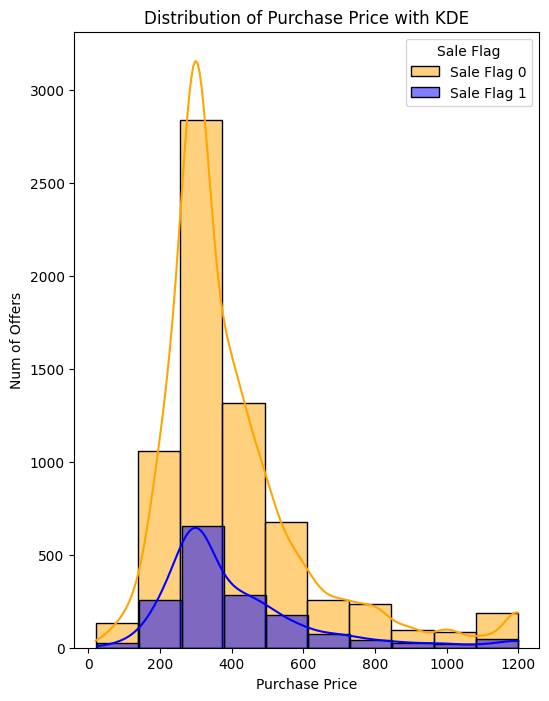

In [28]:
plt.figure(figsize=(6, 8))

# Filter data for each sale_flag value (0 and 1)
df_sale_flag_0 = df[df['sale_flag'] == 0]
df_sale_flag_1 = df[df['sale_flag'] == 1]

# Plot histogram for sale_flag = 0 (in orange)
sns.histplot(df_sale_flag_0['purchase_price'], bins=10, kde=True, color='orange', edgecolor='k', label='Sale Flag 0')

# Plot histogram for sale_flag = 1 (in blue)
sns.histplot(df_sale_flag_1['purchase_price'], bins=10, kde=True, color='blue', edgecolor='k', label='Sale Flag 1')

plt.xlabel('Purchase Price')
plt.ylabel('Num of Offers')
plt.title('Distribution of Purchase Price with KDE')
plt.legend(title='Sale Flag')
plt.show()


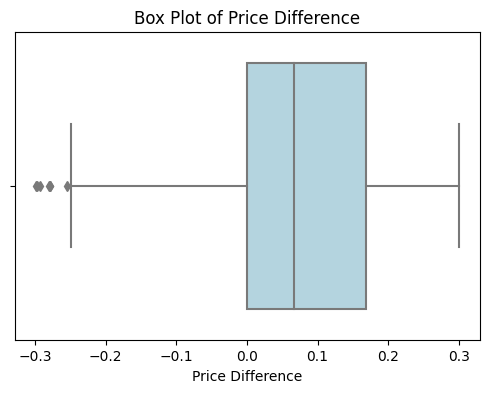

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price_diff'], color='lightblue')
plt.xlabel('Price Difference')
plt.title('Box Plot of Price Difference')
plt.show()

##Conversion Rate and Frequency

###Pricing point

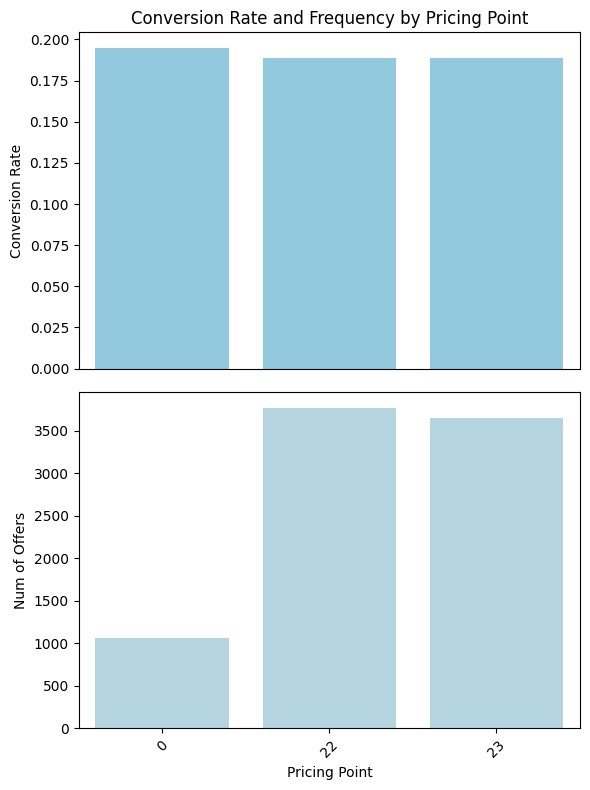

In [30]:
# Group data by 'pricing_point'
grouped_data = df.groupby('pricing_point')

# Calculate total count and sale_flag = 1 count for each pricing_point
total_count = grouped_data['sale_flag'].count()
sale_flag_1_count = grouped_data['sale_flag'].sum()

# Calculate conversion rate for each pricing_point
conversion_rate = sale_flag_1_count / total_count

# Plot the conversion rates and frequency
plt.figure(figsize=(6, 8))

# Subplot 1: Conversion Rate
plt.subplot(2, 1, 1)
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, color='skyblue')
plt.xlabel('')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate and Frequency by Pricing Point')
plt.xticks([])

# Subplot 2: Frequency
plt.subplot(2, 1, 2)
sns.countplot(data=df, x='pricing_point', color='lightblue')
plt.xlabel('Pricing Point')
plt.ylabel('Num of Offers')
#plt.title('Frequency of Pricing Points')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




###Age

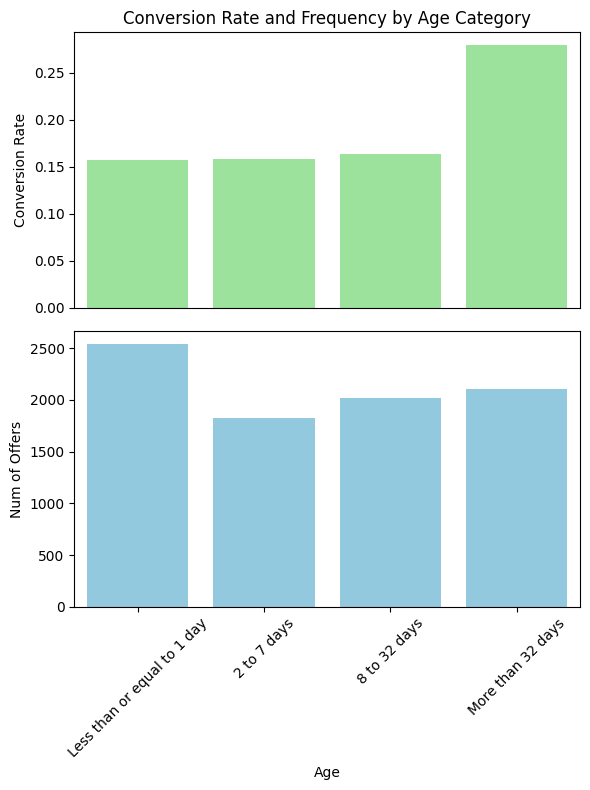

In [31]:
# Group data by 'age_cat'
grouped_data = df.groupby('age_group')

# Calculate total count and sale_flag = 1 count for each age_cat
total_count = grouped_data['sale_flag'].count()
sale_flag_1_count = grouped_data['sale_flag'].sum()

# Calculate conversion rate for each age_cat
conversion_rate = sale_flag_1_count / total_count

# Plot the conversion rates
plt.figure(figsize=(6, 8))

# Subplot 1: Conversion Rate
plt.subplot(2, 1, 1)
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, color='lightgreen')
plt.xlabel('')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate and Frequency by Age Category')
plt.xticks([])

# Subplot 2: Frequency
plt.subplot(2, 1, 2)
sns.countplot(data=df, x='age_group', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Num of Offers')
#plt.title('Frequency of Age Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



###Item Category

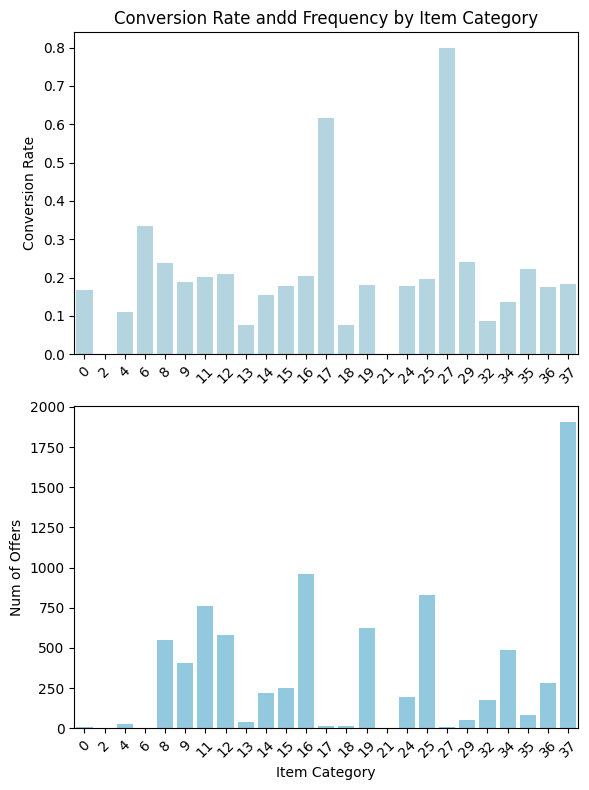

In [32]:
# Group data by 'itemcategoryname_enc'
grouped_data = df.groupby('itemcategoryname_enc')

# Calculate total count and sale_flag = 1 count for each item category
total_count = grouped_data['sale_flag'].count()
sale_flag_1_count = grouped_data['sale_flag'].sum()

# Calculate conversion rate for each item category
conversion_rate = sale_flag_1_count / total_count

# Plot the conversion rates and frequency
plt.figure(figsize=(6, 8))

# Subplot 1: Conversion Rate
plt.subplot(2, 1, 1)
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, color='lightblue')
plt.xlabel('')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate andd Frequency by Item Category')
plt.xticks(rotation=45)

# Subplot 2: Frequency
plt.subplot(2, 1, 2)
sns.countplot(data=df, x='itemcategoryname_enc', color='skyblue')
plt.xlabel('Item Category')
plt.ylabel('Num of Offers')
#plt.title('Frequency of Item Categories')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



###Manufacturer Brand


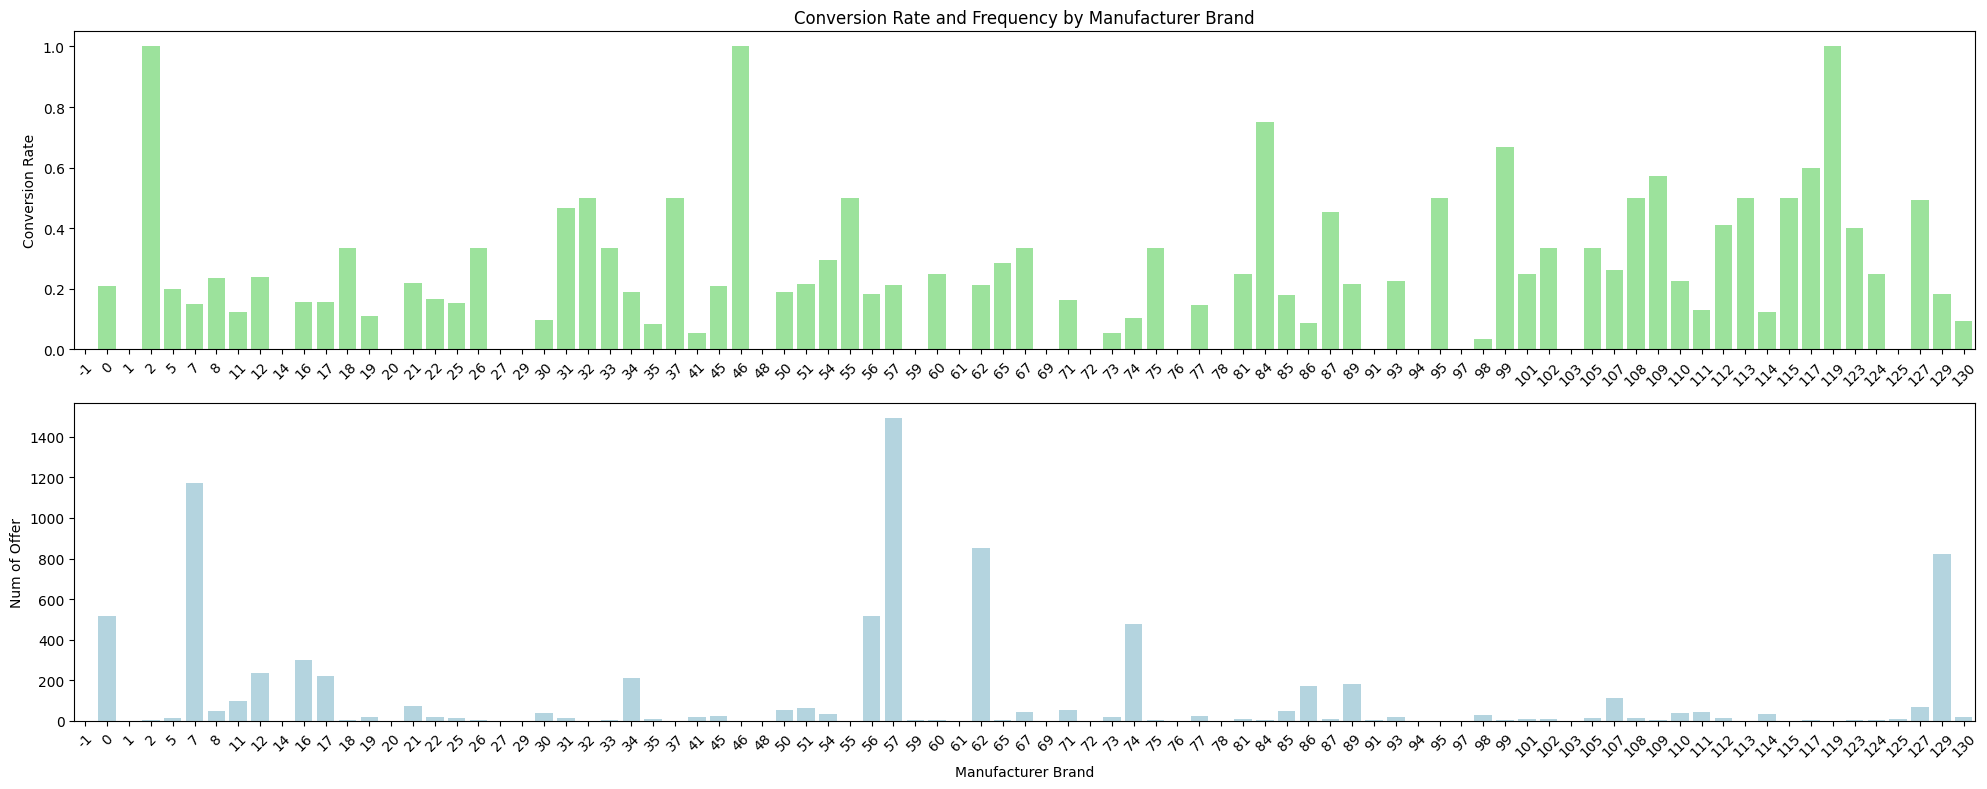

In [33]:
# Group data by 'manufacturerbrandname_enc'
grouped_data = df.groupby('manufacturerbrandname_enc')

# Calculate total count and sale_flag = 1 count for each manufacturer brand
total_count = grouped_data['sale_flag'].count()
sale_flag_1_count = grouped_data['sale_flag'].sum()

# Calculate conversion rate for each manufacturer brand
conversion_rate = sale_flag_1_count / total_count

# Plot the conversion rates and frequency
plt.figure(figsize=(20, 8))

# Subplot 1: Conversion Rate
plt.subplot(2, 1, 1)
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, color='lightgreen')
plt.xlabel('')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate and Frequency by Manufacturer Brand')
plt.xticks(rotation=45)

# Subplot 2: Frequency
plt.subplot(2, 1, 2)
sns.countplot(data=df, x='manufacturerbrandname_enc', color='lightblue')
plt.xlabel('Manufacturer Brand')
plt.ylabel('Num of Offer')
#plt.title('Frequency of Manufacturer Brands')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [34]:
#Top 5 brand for num of offered>200

# Calculate the count of 'offered_fee' for each manufacturer brand
offered_fee_counts = df['manufacturerbrandname_enc'].value_counts()

#Target
target=200

# Filter the manufacturers with an 'offered_fee' count greater than 200
top_manufacturers_offered_gt_200 = offered_fee_counts[offered_fee_counts > target]

# Filter the DataFrame to include only the rows with the top manufacturers having 'offered_fee' count > 200
filtered_df = df[df['manufacturerbrandname_enc'].isin(top_manufacturers_offered_gt_200.index)]

# Calculate the conversion rate for each manufacturer brand in the filtered DataFrame
conversion_rate_filtered = filtered_df.groupby('manufacturerbrandname_enc')['sale_flag'].mean()

# Get the top 5 manufacturers with the highest conversion rates among those with an 'offered_fee' count > 200
top_5_manufacturers_filtered = conversion_rate_filtered.nlargest(5)

# Filter the DataFrame to include only the rows with the top 5 manufacturers and 'offered_fee' count > 200
final_top_5_manufacturers_df = filtered_df[filtered_df['manufacturerbrandname_enc'].isin(top_5_manufacturers_filtered.index)]

# Merge the filtered 'offered_fee_counts' with the top 5 manufacturers DataFrame
merged_df = pd.merge(top_5_manufacturers_filtered, top_manufacturers_offered_gt_200, left_index=True, right_index=True)

# Rename the columns for clarity
merged_df.columns = ['conversion_rate', 'offered_fee_count']

# Display the DataFrame with the count of 'offered_fee' for each top brand
merged_df.head()


,conversion_rate,offered_fee_count
12,0.239496,238
57,0.213807,1492
62,0.212192,853
0,0.208897,517
34,0.189573,211


###Correlation

In [35]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

#  'sale_flag' is the target variable, select features with correlation above a threshold
threshold = 0.1
selected_features = correlation_matrix[abs(correlation_matrix['sale_flag']) > threshold].index.tolist()

# Now 'selected_features' contains the list of features that have a correlation with 'sale_flag' above the specified threshold.


<ipython-input-35-471a496c98c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [36]:
df[selected_features].corr()

,sold_fee,age,predictedconversionrate,plan_flag,plan_count,plansactive_lastyear_count,planscancelled_lastyear_count,claims_count,claim_amount,sale_flag,days_between_offer_purchase,age_cat
sold_fee,1.000000,0.192060,0.134658,0.209745,0.253694,0.226449,0.148340,0.184043,0.107223,0.953540,0.160192,0.095123
age,0.192060,1.000000,0.191081,0.105445,0.106749,0.115359,0.099585,0.091931,0.081264,0.198975,0.820429,0.538511
predictedconversionrate,0.134658,0.191081,1.000000,0.344032,0.353891,0.308277,0.197646,0.205416,0.125199,0.145270,0.151270,0.098576
plan_flag,0.209745,0.105445,0.344032,1.000000,0.803896,0.632806,0.344452,0.417830,0.264822,0.207773,0.080736,-0.008978
plan_count,0.253694,0.106749,0.353891,0.803896,1.000000,0.853765,0.473209,0.534407,0.326980,0.251193,0.088170,0.000567
plansactive_lastyear_count,0.226449,0.115359,0.308277,0.632806,0.853765,1.000000,0.811011,0.622204,0.399502,0.225351,0.095909,0.020535
planscancelled_lastyear_count,0.148340,0.099585,0.197646,0.344452,0.473209,0.811011,1.000000,0.547714,0.379341,0.153088,0.083977,0.034837
claims_count,0.184043,0.091931,0.205416,0.417830,0.534407,0.622204,0.547714,1.000000,0.791361,0.181803,0.078950,0.029585
claim_amount,0.107223,0.081264,0.125199,0.264822,0.326980,0.399502,0.379341,0.791361,1.000000,0.105367,0.068622,0.042367
sale_flag,0.953540,0.198975,0.145270,0.207773,0.251193,0.225351,0.153088,0.181803,0.105367,1.000000,0.168542,0.105455


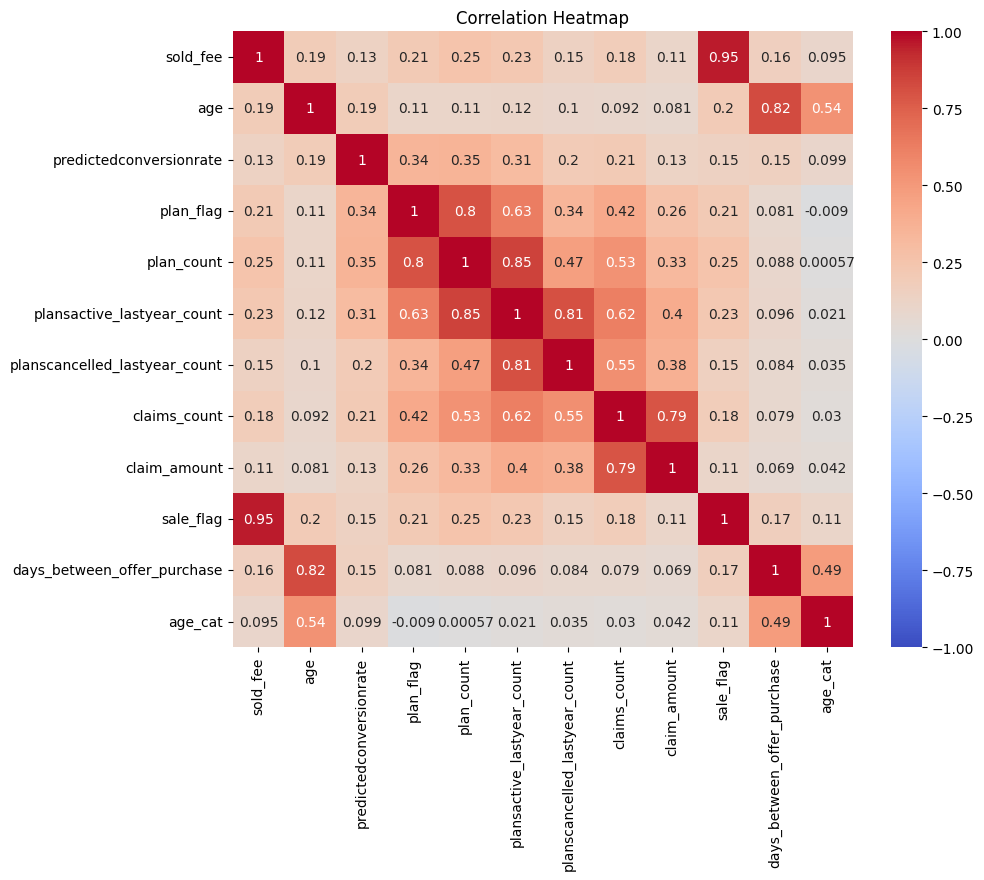

In [37]:
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Heatmap')

plt.show()

#Pricing performance of all strategies

##Metrics

In [38]:
# Group the data by age_category and calculate the metrics
summary_table = df.groupby('pricing_point').agg(
    num_offers=('offered_fee', 'size'),
    avg_base_fee=('base_fee', 'mean'),
    avg_offered_fee=('offered_fee', 'mean'),
    avg_price_increase=('price_diff', 'mean'),
    conversion_rate=('sale_flag', 'mean')
).reset_index()

# Filter the DataFrame to include only rows where sale_flag is 1
df_sale_flag_1 = df[df['sale_flag'] == 1]

# Group the filtered DataFrame by 'age_category' and calculate the average sold fee
avg_sold_fee_df = df_sale_flag_1.groupby('pricing_point').agg(avg_sold_fee=('sold_fee', 'mean')).reset_index()

# Merge the summary_table and avg_sold_fee_df DataFrames on 'age_category'
summary_table = summary_table.merge(avg_sold_fee_df, on='pricing_point', how='left')

# round the values to a specific number of decimal places
summary_table = summary_table.round(4)

# Display the summary table as a DataFrame
summary_table.head()



,pricing_point,num_offers,avg_base_fee,avg_offered_fee,avg_price_increase,conversion_rate,avg_sold_fee
0,0,1064,48.9129,48.9129,0.0000,0.1945,49.4464
1,22,3768,49.0908,55.0085,0.1229,0.1884,54.8048
2,23,3649,48.9875,51.9509,0.0594,0.1888,51.2186


Based on this table, we can make the following observations:

The 'avg_offered_fee' and 'avg_sold_fee' seem to vary between different pricing strategies. Strategy @23% appears to have the highest 'avg_offered_fee' and 'avg_sold_fee', while Strategy ASIS FEE has the lowest 'avg_offered_fee' and 'avg_sold_fee'.

The 'avg_base_fee' appears to be relatively consistent across all pricing strategies, as there are no significant differences among them.

The 'avg_price_increase' also shows some variations between strategies. Strategy @22% has a slightly higher 'avg_price_increase' compared to the other two strategies.

The 'conversion_rate' seems to be relatively consistent among the three strategies, with values around 18-19%. There are no significant differences in the conversion rates among them.


##ANOVA Test

H_0:statistically significant differences in the average among the 'pricing_point'

In [39]:
from scipy.stats import f_oneway

# Define the numerical features for ANOVA
numerical_features = ['offered_fee', 'base_fee', 'sale_flag', 'price_diff']
strategy = 'pricing_point'

# Split the data into groups for each strategy
strategies = df[strategy].unique()

# Perform ANOVA for each numerical feature
for feature in numerical_features:
    print(f"ANOVA for '{feature}'")
    strategy_data = [df[df[strategy] == s][feature] for s in strategies]
    f_statistic, p_value = f_oneway(*strategy_data)

    # Define the significance level (alpha)
    alpha = 0.05

    # Interpret the results
    if p_value < alpha:
        print("There are statistically significant differences in the average among the strategies.")
    else:
        print("There are no statistically significant differences in the average among the strategies.")

    print(f"F-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}\n")


ANOVA for 'offered_fee'
There are statistically significant differences in the average among the strategies.
F-statistic: 70.6887, p-value: 0.0000

ANOVA for 'base_fee'
There are no statistically significant differences in the average among the strategies.
F-statistic: 0.0939, p-value: 0.9104

ANOVA for 'sale_flag'
There are no statistically significant differences in the average among the strategies.
F-statistic: 0.1074, p-value: 0.8982

ANOVA for 'price_diff'
There are statistically significant differences in the average among the strategies.
F-statistic: 510.2965, p-value: 0.0000



The small p-values suggest that the null hypothesis (no difference in means) is rejected for 'offered_fee' and 'price_diff', indicating that there are significant differences in the means among the strategies for these features. On the other hand, the high p-values for 'base_fee' and 'sale_flag' indicate that there is no significant evidence to reject the null hypothesis for these features, meaning that there are no significant differences in the means among the strategies for 'base_fee' and 'sale_flag'.

##Price Elasticity

In [40]:
 # Calculate the price elasticity for each strategy
price_elasticity = []
for idx, row in summary_table.iterrows():
    # Calculate the percentage change in conversion rate
    percentage_change_conversion = ((row['conversion_rate'] - summary_table.loc[0, 'conversion_rate']) / summary_table.loc[0, 'conversion_rate']) * 100

    # Calculate the percentage change in average premium
    percentage_change_premium = ((row['avg_sold_fee'] - summary_table.loc[0, 'avg_sold_fee']) / summary_table.loc[0, 'avg_sold_fee']) * 100

    # Check for zero percentage change in premium to avoid division by zero
    if percentage_change_premium == 0:
        elasticity = 0.0
    else:
        # Calculate the price elasticity using the formula
        elasticity = percentage_change_conversion / percentage_change_premium

    price_elasticity.append(elasticity)

# Add the price elasticity values to the summary_table DataFrame
summary_table['price_elasticity'] = price_elasticity

# Display the summary table with price elasticity
summary_table.head()

,pricing_point,num_offers,avg_base_fee,avg_offered_fee,avg_price_increase,conversion_rate,avg_sold_fee,price_elasticity
0,0,1064,48.9129,48.9129,0.0000,0.1945,49.4464,0.000000
1,22,3768,49.0908,55.0085,0.1229,0.1884,54.8048,-0.289407
2,23,3649,48.9875,51.9509,0.0594,0.1888,51.2186,-0.817668


A negative price elasticity indicates an inverse relationship between price and quantity demanded. In this case, Pricing Point @23% has the most negative price elasticity (-0.817668), indicating that it is the strategy with the highest price elasticity. This means that small changes in price for Pricing Point @23% are likely to result in more significant changes in the quantity demanded compared to the other pricing points.

From a pricing perspective, a higher price elasticity suggests that Pricing Point @23% may be more sensitive to price changes and could potentially benefit from adjustments in pricing to optimise revenue and sales.

'num_offers': The number of offers for each pricing strategy indicates the volume of offers made under each strategy. Strategy @22% has the highest number of offers (3768), followed by Strategy @23% (3649), and Strategy ASIS FEE (1064).


'avg_base_fee': The average base fee for each pricing strategy represents the average price of the base fee under each strategy. There is a slight difference in average base fees, with Strategy @22% having the highest average base fee (49.0908), followed by Strategy @23% (48.9875), and Strategy ASIS FEE (48.9129).


'avg_offered_fee': The average offered fee for each pricing strategy indicates the average price of the offered fee under each strategy. Strategy @22% has the highest average offered fee (55.0085), followed by Strategy @23% (51.9509), and Strategy ASIS FEE (48.9129).


'avg_price_increase': The average price increase for each pricing strategy represents the average difference between the offered fee and the base fee. Strategy @22% has the highest average price increase (0.1229), followed by Strategy @23% (0.0594), and Strategy ASIS FEE (0.0000).


'conversion_rate': The conversion rate for each pricing strategy indicates the percentage of successful sales out of the total offers made under each strategy. All three strategies have similar conversion rates, with Strategy ASIS FEE having the highest conversion rate (0.1945), followed by Strategy @23% (0.1888), and Strategy @22% (0.1884).


'avg_sold_fee': The average sold fee for each pricing strategy represents the average price of the sold fee (successful sales) under each strategy. Strategy @22% has the highest average sold fee (54.8048), followed by Strategy @23% (51.2186), and Strategy ASIS FEE (49.4464).


'price_elasticity': The price elasticity for each pricing strategy measures the responsiveness of demand to price changes. Negative values indicate inelastic demand, where demand decreases less than proportionately to price increases. Strategy @23% has the highest price elasticity value (-0.817668), indicating more inelastic demand compared to Strategy @22% (-0.289407) and Strategy ASIS FEE (0.000000).


Overall, we observe that Strategy @22% has the highest average offered fee and price increase, which could potentially result in higher revenue per offer. However, this strategy also exhibits more inelastic demand compared to the other two strategies. On the other hand, Strategy ASIS FEE maintains the same base fee as the offered fee, and while it has the lowest average offered fee, it still achieves a relatively high conversion rate.

##Relationship between conversion and claims

In [41]:
# Assuming you have a DataFrame named 'df' with 'conversion_rate', 'Claim_count', and 'Claim_amount' columns
correlation_conversion_claim_count = df['sale_flag'].corr(df['claims_count'])
correlation_conversion_claim_amount = df['sale_flag'].corr(df['claim_amount'])

print(f"Correlation between conversion_rate and Claim_count: {correlation_conversion_claim_count}")
print(f"Correlation between conversion_rate and Claim_amount: {correlation_conversion_claim_amount}")

Correlation between conversion_rate and Claim_count: 0.18180280350840314
Correlation between conversion_rate and Claim_amount: 0.10536744385109062


This suggests that there might be some indirect relationship between conversion and claims, but it's not a strong and direct relationship.

In [42]:
# Assuming you have the DataFrame 'df' containing the relevant data

# Group the data by 'pricing_point' and calculate the conversion rate for each group
conversion_rates = df.groupby('pricing_point')['sale_flag'].mean()

print(conversion_rates)


pricing_point
0     0.194549
22    0.188429
23    0.188819
Name: sale_flag, dtype: float64


In [43]:
# Assuming you have the DataFrame 'df' containing the relevant data
# And you have already trained your model and obtained the predicted conversion rates in the 'predictedconversionrate' column

# Group the data by 'pricing_point' and calculate the average predicted conversion rate for each group
predicted_conversion_rates = df.groupby('pricing_point')['predictedconversionrate'].mean()

print(predicted_conversion_rates)


pricing_point
0     1.000000
22    0.205695
23    0.214716
Name: predictedconversionrate, dtype: float64


In [44]:

mae = mean_absolute_error(conversion_rates, predicted_conversion_rates)
mse = mean_squared_error(conversion_rates, predicted_conversion_rates)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.2828716961126878
Mean Squared Error (MSE): 0.21657344352577002


Based on the provided MAE and MSE values, it seems that the model's predicted conversion rate is relatively accurate and not heavily biased.The Mean Absolute Error (MAE) and Mean Squared Error (MSE) for the predicted conversion rate are relatively low, indicating that the models' predictions are close to the actual values.

#Predictive Model

##LogisticRegression

In [45]:
# Split the data into features (X) and the target variable (y)
X = df[selected_features].drop(columns=['sale_flag','sold_fee'])
y = df['sale_flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression model with class weights
model = LogisticRegression(class_weight='balanced')

# Fit the model to the scaled resampled training data
model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7807896287566294
Precision: 0.3988439306358382
Recall: 0.45695364238410596
F1-score: 0.425925925925926
Confusion Matrix:
[[1187  208]
 [ 164  138]]


##Deep Learning

In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already loaded the dataset into a DataFrame named 'df'
# And selected the features in 'selected_features'

# Split the data into features (X) and the target variable (y)
X = df[selected_features].drop(columns=['sale_flag', 'sold_fee'])
y = df['sale_flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Build the deep learning model with TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_resampled_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with class weights and binary_crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the resampled and scaled training data
model.fit(X_train_resampled_scaled, y_train_resampled, epochs=100, batch_size=32)

# Make predictions on the scaled test data
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/100
343/343 [==============================] - 1s 1ms/step - loss: 0.6487 - accuracy: 0.6286
Epoch 2/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.6528
Epoch 3/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.6602
Epoch 4/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.6658
Epoch 5/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.6663
Epoch 6/100
343/343 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6663
Epoch 7/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.6675
Epoch 8/100
343/343 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 0.6733
Epoch 9/100
343/343 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.6714
Epoch 10/100
343/343 [==============================] - 1s 2ms/step - loss: 0.5940 - accura

In [47]:
#developing model with more layers

# Split the data into features (X) and the target variable (y)
X = df[selected_features].drop(columns=['sale_flag', 'sold_fee'])
y = df['sale_flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Build the deep learning model with TensorFlow/Keras
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_resampled_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

# Compile the model with class weights and binary_crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define learning rate schedule
lr_schedule = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model on the resampled and scaled training data
model.fit(X_train_resampled_scaled, y_train_resampled,
          epochs=100, batch_size=32,
          validation_data=(X_test_scaled, y_test),
          callbacks=[lr_schedule, early_stopping])

# Make predictions on the scaled test data
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/100
343/343 [==============================] - 3s 3ms/step - loss: 0.7842 - accuracy: 0.5599 - val_loss: 0.6415 - val_accuracy: 0.7943 - lr: 0.0010
Epoch 2/100
343/343 [==============================] - 1s 3ms/step - loss: 0.6790 - accuracy: 0.6014 - val_loss: 0.6242 - val_accuracy: 0.7861 - lr: 0.0010
Epoch 3/100
343/343 [==============================] - 1s 3ms/step - loss: 0.6524 - accuracy: 0.6256 - val_loss: 0.6211 - val_accuracy: 0.7849 - lr: 0.0010
Epoch 4/100
343/343 [==============================] - 1s 3ms/step - loss: 0.6449 - accuracy: 0.6366 - val_loss: 0.5946 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 5/100
343/343 [==============================] - 1s 3ms/step - loss: 0.6356 - accuracy: 0.6480 - val_loss: 0.5971 - val_accuracy: 0.7843 - lr: 0.0010
Epoch 6/100
343/343 [==============================] - 1s 3ms/step - loss: 0.6287 - accuracy: 0.6561 - val_loss: 0.5969 - val_accuracy: 0.7831 - lr: 0.0010
Epoch 7/100
343/343 [==============================] - 1s 3ms/st

##Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

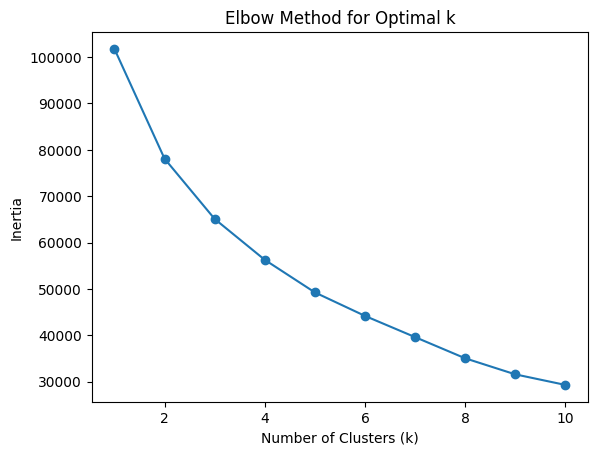

In [48]:
#behavioural segmentation
X = df[selected_features]

# Perform Standard Scaling on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (k) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


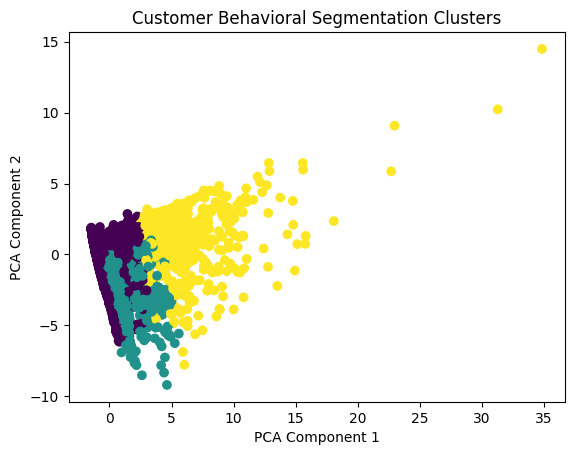

In [49]:

# Based on the Elbow Method, select the optimal value of k (number of clusters)
# Let's assume the optimal value is 3
num_clusters = 3

# Apply K-means clustering to segment the customers
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['segment'] = kmeans.fit_predict(X_scaled)


# Visualise the clusters (for 2D visualisation, we use the first two principal components)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['segment'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Behavioral Segmentation Clusters')
plt.show()


In [50]:
# Analyze the customer segments
segment_counts = df['segment'].value_counts()
print(segment_counts)

0    6577
1    1340
2     564
Name: segment, dtype: int64


In [51]:
# Group the data by age_category and calculate the metrics
summary_table = df.groupby('segment').agg(
    num_offers=('offered_fee', 'size'),
    avg_base_fee=('base_fee', 'mean'),
    avg_offered_fee=('offered_fee', 'mean'),
    avg_price_increase=('price_diff', 'mean'),
    conversion_rate=('sale_flag', 'mean')
).reset_index()

# Filter the DataFrame to include only rows where sale_flag is 1
df_sale_flag_1 = df[df['sale_flag'] == 1]

# Group the filtered DataFrame by 'age_category' and calculate the average sold fee
avg_sold_fee_df = df_sale_flag_1.groupby('segment').agg(avg_sold_fee=('sold_fee', 'mean')).reset_index()

# Merge the summary_table and avg_sold_fee_df DataFrames on 'age_category'
summary_table = summary_table.merge(avg_sold_fee_df, on='segment', how='left')

# round the values to a specific number of decimal places
summary_table = summary_table.round(4)

# Display the summary table as a DataFrame
summary_table.head()

,segment,num_offers,avg_base_fee,avg_offered_fee,avg_price_increase,conversion_rate,avg_sold_fee
0,0,6577,49.0409,52.9145,0.0788,0.0000,NaN
1,1,1340,48.5691,52.3045,0.0799,0.9888,52.3624
2,2,564,49.9089,54.5700,0.0961,0.4982,53.5811


In [52]:
# Assuming you have customer data in a DataFrame named 'df' with the 'segment' column from segmentation
# and other relevant columns such as 'claim_amount', 'plan_flag', 'plan_count', 'plansactive_lastyear_count', and 'planscancelled_lastyear_count'

# Group the data by 'segment' and calculate the sums
segment_sums = df.groupby('segment').agg(
    avg_claim_amount=('claim_amount', 'mean'),
    sum_plan_flag=('plan_flag', 'sum'),
    sum_plan_count=('plan_count', 'sum'),
    sum_plansactive_lastyear_count=('plansactive_lastyear_count', 'sum'),
    sum_planscancelled_lastyear_count=('planscancelled_lastyear_count', 'sum')
)

# Display the sums for each segment
segment_sums.head()


,avg_claim_amount,sum_plan_flag,sum_plan_count,sum_plansactive_lastyear_count,sum_planscancelled_lastyear_count
segment,,,,,
0,5.176774,649,803.0,1236.0,445.0
1,16.379672,279,404.0,558.0,157.0
2,299.051418,547,1965.0,3634.0,1292.0
